Academic Honesty Statement
Please submit the following Academic Honesty statement, along with your first assignment:


I certify that:
+ My work will be entirely my own work.
+ I will not quote the words of any other person from a printed source or a website without indicating what has been quoted and providing an appropriate citation.
+ I will not submit my work in this course to satisfy the requirements of any other course.


Signature: Suresh Athanti <br>
Date : 5/18/2020


Provide your name and date with the statement.

This statement is for the entire course.

# INFO 634 Assigment 2 (12 points)

## Preparation

Please import all necessary packages and setup ```%matplotlib``` for inline plots in the report. Also, load the dataset, which you can download from here: [Yelp_Usefulness_Assignment2_1.csv](./data/Yelp_Usefulness_Assignment2_1.csv). There are several versions of the dataset, so please make sure that you load the correct version. Please refer to the [Python Data Proprocessing](http://keensee.com/pdp/python/python_data_preprocessing.html) for details about the dataset.

In [249]:
## Imports all necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import linalg
from scipy import stats
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)
## This loads the csv file from disk
yelp_data = pd.read_csv(
    filepath_or_buffer = "Yelp_Usefulness_Assignment2_1.csv", sep = ",", header=0 )

yelp_data.head(20)
## print the dimension of the data
# print(yelp_data.shape)


,review_id,review_stars,word_count,lexical_diversity,correct_spell_ratio,price_included,procon_included,joy,love,affection,liking,enthusiasm,sadness,dislike,despair,horror,distress,FleschReadingEase,user_review_count,yelping_months,degree,betweenness,eigenvector,business_stars,business_review_count,class
0,bRGHgwAd3zfiiDMT9JyKcA,1,23,0.869565,0.869565,0.000000,0,0.0,0.000000,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,81.1310,5,24,0,0.000000,0.000000,3.0,40,useful
1,TK-0pfhHorvwZK0YhDe2fQ,5,26,0.769231,0.846154,0.000000,0,0.0,0.000000,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,48.9568,22,6,1,0.000000,0.000000,4.5,319,useful
2,XTOQ6blQzzzoK26QRJl3zg,5,71,0.760563,0.943662,0.014085,0,0.0,0.000000,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,95.9393,10,14,0,0.000000,0.000000,4.5,535,not_useful
3,KA9VwKYL-7I2LuQnXeuEBw,5,74,0.689189,0.905405,0.000000,0,0.0,0.000000,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,86.9222,1,3,0,0.000000,0.000000,5.0,28,useful
4,C2kblEfR4oMWR9oGhYN2cQ,5,31,0.903226,0.903226,0.000000,0,0.0,0.000000,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,63.0018,19,40,0,0.000000,0.000000,3.5,84,useful
5,mTA_VwPiWw6cubKHAsrIkQ,5,32,0.875000,0.812500,0.031250,0,0.0,0.000000,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,83.5138,192,34,16,0.000035,0.006457,5.0,19,useful
6,cnZI2W7C-D_w38WHMRer3w,1,124,0.572581,0.959677,0.008065,0,0.0,0.000000,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,79.5758,3,8,1,0.000000,0.000004,4.5,692,useful
7,UlxgrLCL9WOjJL5hZ1Zd9A,2,374,0.631016,0.882353,0.000000,0,0.0,0.002667,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,70.6751,459,58,51,0.000007,0.024421,4.0,47,useful
8,P5Sx85NU3sALCtbOx1Qgvg,2,45,0.888889,0.777778,0.000000,0,0.0,0.000000,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,91.7543,45,74,0,0.000000,0.000000,5.0,290,useful
9,Agb8ItmoRPyXPdQ8jLEgJw,4,60,0.633333,0.883333,0.000000,0,0.0,0.000000,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,77.6478,3,3,0,0.000000,0.000000,4.5,20,not_useful


In [250]:
print(yelp_data.shape)

(1005, 26)


In [242]:
yelp_data.describe()

,review_stars,word_count,lexical_diversity,correct_spell_ratio,price_included,procon_included,joy,love,affection,liking,enthusiasm,sadness,dislike,despair,horror,distress,FleschReadingEase,user_review_count,yelping_months,degree,betweenness,eigenvector,business_stars,business_review_count
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.0,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1000.000000,1005.000000,1005.000000
mean,3.610945,90.032836,0.769416,0.881487,0.005982,0.002985,0.000016,0.002616,0.000011,0.000010,0.000024,0.000068,0.0,0.000022,0.000639,0.000071,78.860038,123.175124,33.384080,21.121393,0.000395,0.005587,3.791542,380.173134
std,1.533452,91.690617,0.101912,0.055330,0.012525,0.054581,0.000501,0.009116,0.000238,0.000133,0.000357,0.000977,0.0,0.000701,0.004119,0.000719,13.613453,330.297842,23.945817,65.234401,0.002112,0.017273,0.747558,651.102814
min,1.000000,3.000000,0.438134,0.444444,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-37.145400,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000
25%,2.000000,32.000000,0.701299,0.850242,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,72.455400,6.000000,13.000000,0.000000,0.000000,0.000000,3.500000,43.000000
50%,4.000000,59.000000,0.769231,0.885714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,79.903400,21.000000,30.000000,1.000000,0.000000,0.000000,4.000000,153.000000
75%,5.000000,113.000000,0.838710,0.914286,0.006897,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,86.860400,94.000000,51.000000,8.000000,0.000086,0.001192,4.500000,426.000000
max,5.000000,664.000000,1.000000,1.000000,0.100000,1.000000,0.015873,0.105263,0.005848,0.001724,0.007463,0.022727,0.0,0.022222,0.058824,0.011111,118.175000,3448.000000,114.000000,722.000000,0.038897,0.140342,5.000000,6200.000000


## 1. Data Cleaning

The data from the real world is not necessarily clean. Therefore, you need to clean your data. If it is not cleaned properly, it can have a significant impact on the analysis. You need to find three problems in the loaded data. It should be noted that there might be more than three problems. As far as you can find three major problems, you will meet the expectation. Examine the data by applying descriptive analysis and other measures. The data preprocessing exercise should include the basic code and procedures for this. Once you found those problems,  please describe those problems and explain how you will handle the problems. You also need to provide rationale and pros/cons for your approach in detail. 

### 1.1. The first problem (1 point)
1.1.1 What is the first problem you found? How did you find it?

In [251]:
## Provide codes to find the problem
yelp_data[["review_id", "class"]].describe()

,review_id,class
count,1005,1005
unique,1000,3
top,rTOlJ2zPkn5IH06D37A8-w,useful
freq,6,498


In [252]:
print(yelp_data['class'].unique())

['useful' 'not_useful' 'not useful']


##### Provide your open-ended answer
<font color='blue'>From the dataset we could see that the categorical variables are 'review_id' and 'class'. For description about the categorical varialbels we could use .describe(). From the description analysis we could see that the unique values for the class are given as 3 types. but actually it should be two values ('useful' and 'not_useful')</font>

1.1.2 How will you handle this problem? Please code your approach.

##### Provide your open-ended answer
<font color='blue'>To handle the problem we could replace 'not useful' with 'not_useful' in the dataset. Once it is replaced we can have the dataset with two types of clasess which can be used for classification. </font>

In [253]:
## Provide codes to handle the problem
yelp_data['class'][yelp_data['class'] == 'not useful'] = 'not_useful'
yelp_data['class'].unique()

array(['useful', 'not_useful'], dtype=object)

1.1.3 What are pros/cons of your approach?

#### Provide your open-ended answer
<font color='blue'>If we replace the class value 'not useful' with 'not_useful' we can avaoid the data loss. If the categorical values are more than 2 types then it is difficult to do the classification task. </font>


### 1.2. The second problem (1 point)
1.2.1 What is the second problem you found? How did you find it?

In [254]:
## Provide codes to find the problem
yelp_data['eigenvector'].count()

1000

Text(0.5, 1.0, "The normalized number of words related to 'eigenvector'")

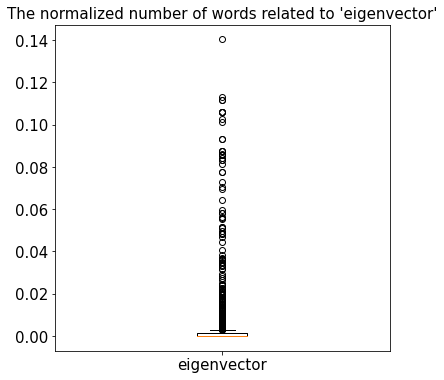

In [255]:
fig = plt.figure(figsize = (6, 6))

## Make the box plot
plt.boxplot(
    ## We beed to drop tuples that include missing values
    yelp_data["eigenvector"][~yelp_data["eigenvector"].isna()], labels = ["eigenvector"]
)

## Adjust the tick and label font size
plt.tick_params(labelsize = 15)

## Set the title
plt.title("The normalized number of words related to 'eigenvector'", fontsize = 15)

##### Provide your open-ended answer
<font color='blue'>From the dataset we could see that the count of the each attribute can be found using the yelp_data.count() function. after finding the count of each attribute we could see that the <b>'eigenvector'</b> has the missing values. this can be considered as the one of the problem with the data. </font>

1.2.2 How will you handle this problem?. Please code your approach.

##### Provide your open-ended answer
<font color='blue'> From the data distribution we could see that the eigenvector data values are skewed. we can use median centrality tendency for filling na values. </font>

In [256]:
## Provide codes to handle the problem
median = np.median(yelp_data["eigenvector"][~yelp_data["eigenvector"].isna()])
yelp_data["eigenvector"].fillna(median, inplace=True)
yelp_data["eigenvector"].count()

1005

1.2.3 What are pros/cons of your approach?

#### Provide your open-ended answer
<font color='blue'>It is clear that the data is more skewed and filling missing values with mean is prone to the data and outliers. we can take median for filling the missing values in the dataset because it is less prone to the outliers and skewed data. moreover, if we fill the missing values the data is not reduced.</font>

### 1.3. The third problem (1 point)
1.3.1 What is the third problem your found? How did you find it?

In [257]:
## Provide codes to find the problem 
from collections import Counter
count = Counter(yelp_data['review_id'])
count.most_common(10)

[('rTOlJ2zPkn5IH06D37A8-w', 6),
 ('bRGHgwAd3zfiiDMT9JyKcA', 1),
 ('TK-0pfhHorvwZK0YhDe2fQ', 1),
 ('XTOQ6blQzzzoK26QRJl3zg', 1),
 ('KA9VwKYL-7I2LuQnXeuEBw', 1),
 ('C2kblEfR4oMWR9oGhYN2cQ', 1),
 ('mTA_VwPiWw6cubKHAsrIkQ', 1),
 ('cnZI2W7C-D_w38WHMRer3w', 1),
 ('UlxgrLCL9WOjJL5hZ1Zd9A', 1),
 ('P5Sx85NU3sALCtbOx1Qgvg', 1)]

##### Provide your open-ended answer
<font color='blue'>From the dataset description we could see that one review_id is having a frequency of 6 which can be considered as duplicate id. the above code shows the most frequent id ('rTOlJ2zPkn5IH06D37A8-w') which is in the dataset. </font>

1.3.2 How will you handle the problems. Please code your approach.

##### Provide your open-ended answer
<font color='blue'>From the data we could see that one review id is repeated 6 times which causes duplicates in the data. so it is better to remove the duplicates because data duplication can cause bias in the prediction of the model. </font>

In [258]:
## Provide codes to handle the problem
yelp_data.drop_duplicates(inplace=True)
yelp_data.count()

review_id                1000
review_stars             1000
word_count               1000
lexical_diversity        1000
correct_spell_ratio      1000
price_included           1000
procon_included          1000
joy                      1000
love                     1000
affection                1000
liking                   1000
enthusiasm               1000
sadness                  1000
dislike                  1000
despair                  1000
horror                   1000
distress                 1000
FleschReadingEase        1000
user_review_count        1000
yelping_months           1000
degree                   1000
betweenness              1000
eigenvector              1000
business_stars           1000
business_review_count    1000
class                    1000
dtype: int64

1.3.3 What are pros/cons of your approach?

#### Provide your open-ended answer
<font color='blue'> If we are not removing the duplicate values then it will cause bias when we are modelling. There is a chance that Mean and Median 
values for the numric attributes will be effected. So, we always remove duplicate values while preprocessing the data.</font>

## 2. Data Normalization + Reduction

In data mining, you need to scale data to the same range to avoid dependence on the choice of measurement units (e.g., lb vs. kg). You also want to obtain a reduced representation of the dataset that is much smaller in volume but yet produces the same (or almost the same) analytical results. 

In this assignment, you will explore different options for feature subset selection (e.g., metrics and methods) and normalization (e.g., z-transformation and max-min). After exploring all options, the goal is to create the best classifier. The performance will be measured by accuracy, the ratio of the number of correct predictions to the total number of input samples, considering the even distribution of the class. You are not allowed to explore any options other than feature subset selection and normalization. For instance, you can only use one machine learning algorithm (Logistic Regression). You cannot create a new attribute, and so on. In this way, you can know how feature subset selection and normalization would contribute to the modeling. It should be noted that we are not splitting the dataset into the training set and testing set, although the generalizability of the classifiers' performance can be tested only with the unseen data (i.e., testing data). We will learn about this topic later. 

Please load the dataset ([Yelp_Usefulness_Assignment2_2.csv](./data/Yelp_Usefulness_Assignment2_2.csv)). There are several versions of the dataset, so please make sure that you load the correct version. 

In [264]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## This loads the csv file from disk
yelp_data = pd.read_csv(
    filepath_or_buffer = "Yelp_Usefulness_Assignment2_2.csv", sep = ",", header=0 )

yelp_data.head()

,review_id,review_stars,word_count,lexical_diversity,correct_spell_ratio,price_included,procon_included,joy,love,affection,liking,enthusiasm,sadness,dislike,despair,horror,distress,FleschReadingEase,user_review_count,yelping_months,degree,betweenness,eigenvector,business_stars,business_review_count,class
0,bRGHgwAd3zfiiDMT9JyKcA,1,23,0.869565,0.869565,0.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,81.1310,5,24,0,0.0,0.0,3.0,40,useful
1,TK-0pfhHorvwZK0YhDe2fQ,5,26,0.769231,0.846154,0.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,48.9568,22,6,1,0.0,0.0,4.5,319,useful
2,XTOQ6blQzzzoK26QRJl3zg,5,71,0.760563,0.943662,0.014085,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,95.9393,10,14,0,0.0,0.0,4.5,535,not_useful
3,KA9VwKYL-7I2LuQnXeuEBw,5,74,0.689189,0.905405,0.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,86.9222,1,3,0,0.0,0.0,5.0,28,useful
4,C2kblEfR4oMWR9oGhYN2cQ,5,31,0.903226,0.903226,0.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,63.0018,19,40,0,0.0,0.0,3.5,84,useful


In [196]:
yelp_data.shape

(1000, 26)

Then, we are going to build a baseline model by using the Logistic Regression classifier. At the end of the following code, you can see the accuracy of this baseline classifier (0.752). After exploring various options for the normalization and feature subset selection, you would want to beat this baseline model.

In [265]:
## Create feature matrix by dropping the review_id and label attribute
## Review_id is not going to helpful to predict the usefulness of reviews
X = yelp_data.drop(["review_id","class"], 1)    

## Pre-processing. Sklearn takes integer as label
## Create target attribute
# yelp_data['class'][yelp_data['class'] == 'useful'] = 1
# yelp_data[yelp_data['class'] == 'not_useful'] = 0

yelp_data['class'][yelp_data['class'] == 'useful'] = 1
yelp_data['class'][yelp_data['class'] == 'not_useful'] = 0

## Specify the data type. Before specifying, the type was unknown
y = yelp_data["class"].astype('int')

## Create a model
clf = LogisticRegression()
clf.fit(X, y)

## predict target class based on the trained model 
predictions = clf.predict(X)

## Calculate the performance of the classifier
accuracy = accuracy_score(predictions, y)

print(accuracy)

0.753


In [198]:
Selected_data = yelp_data[['review_stars','word_count','lexical_diversity','user_review_count','yelping_months','degree','betweenness','eigenvector','joy','love']] 

clf = LogisticRegression()
clf.fit(Selected_data, y)

## predict target class based on the trained model 
predictions = clf.predict(Selected_data)

## Calculate the performance of the classifier
accuracy = accuracy_score(predictions, y)

print(accuracy)

0.753


Here is an example to scale data using z-scale. 

```python
## Apply z-transformation
z_scaler = preprocessing.StandardScaler()
X_scaled = z_caler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
```

Here is an example to scale data using max-min transformation.

```python
## Apply Min_Max Scaler
min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)
X_minmax = pd.DataFrame(X_minmax, columns = X.columns)
```

In [199]:
from sklearn.preprocessing import StandardScaler
# X = yelp_data.drop(["review_id","class"], 1)  

# yelp_data[yelp_data['class'] == 'useful'] = 1
# yelp_data[yelp_data['class'] == 'not_useful'] = 0

# y = yelp_data["class"].astype('int')

z_scaler = preprocessing.StandardScaler()
X_scaled = z_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

clf = LogisticRegression()
clf.fit(X_scaled, y)

predictions = clf.predict(X_scaled)

accuracy = accuracy_score(predictions, y)

print(accuracy)

0.748


In [200]:
# X = yelp_data.drop(["review_id","class"], 1)  

# yelp_data[yelp_data['class'] == 'useful'] = 1
# yelp_data[yelp_data['class'] == 'not_useful'] = 0

# y = yelp_data["class"].astype('int')

min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)
X_minmax = pd.DataFrame(X_minmax, columns = X.columns)

clf = LogisticRegression()
clf.fit(X_minmax, y)

predictions = clf.predict(X_minmax)

accuracy = accuracy_score(predictions, y)

print(accuracy)

0.731


Here is an example of using forward feature selection with max_min transformation.

```python
## import the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)
X_minmax = pd.DataFrame(X_minmax, columns = X.columns)

## Sequential Forward Selection(sfs)
sfs = SFS(LogisticRegression(),
           k_features=(1,X_minmax.shape[1]),
           forward=True, 
           floating=False,
           scoring = 'accuracy',
           cv = 10)

sfs = sfs.fit(X_minmax, y)
## Get the final set of features
print(sfs.k_feature_names_)

X_selected = sfs.transform(X_minmax)

# Fit the estimator using the new feature subset
# and make a prediction on the test data
clf.fit(X_selected, y)
predictions = clf.predict(X_selected)

## Calculate the performance of the classifier
accuracy = accuracy_score(predictions, y)

print(accuracy)
```

In [270]:
## import the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

z_scaler = preprocessing.StandardScaler()
X_scaled = z_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

## Sequential Forward Selection(sfs)
sfs = SFS(LogisticRegression(),
           k_features=(10,X_scaled.shape[1]),
           forward=False, 
           floating=True,
           scoring = 'accuracy',
           cv = 8)

sfs = sfs.fit(X_scaled, y)
## Get the final set of features
print(sfs.k_feature_names_)

X_selected = sfs.transform(X_scaled)

# Fit the estimator using the new feature subset
# and make a prediction on the test data
clf.fit(X_selected, y)
predictions = clf.predict(X_selected)

## Calculate the performance of the classifier
accuracy = accuracy_score(predictions, y)

print(accuracy)

('review_stars', 'word_count', 'procon_included', 'love', 'affection', 'liking', 'FleschReadingEase', 'user_review_count', 'yelping_months', 'degree', 'betweenness')
0.753


In [213]:
sfs = SFS(LogisticRegression(),
           k_features=(10,X.shape[1]),
           forward=True, 
           floating=False,
           scoring = 'accuracy',
           cv = 10)

sfs = sfs.fit(X, y)
## Get the final set of features
print(sfs.k_feature_names_)

X_selected = sfs.transform(X)

# Fit the estimator using the new feature subset
# and make a prediction on the test data
clf.fit(X_selected, y)
predictions = clf.predict(X_selected)

## Calculate the performance of the classifier
accuracy = accuracy_score(predictions, y)

print(accuracy)

('review_stars', 'word_count', 'correct_spell_ratio', 'price_included', 'procon_included', 'joy', 'love', 'FleschReadingEase', 'yelping_months', 'degree')
0.757


Actually, the performance would be lower than the baseline classifier, if you use the forward feature selection with max_min transformation. Now, explore all possible options. For instance, you can set the "forward" argument of the SequentialFeatureSelector as "False" to use backward feature selection. If you set the "floating" argument as "True", then you will use bi-directional stepwise feature selection. You can also change "scoring" and "cv" options. 

Please refer to the following link for the detailed arguments options:
http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/#sequential-feature-selector

Enjoy all options, find the best classifier, and answer the following questions.

### 2.1. Performance (1 point)
What was the best performance you got? Please provide the code for your best classifier. The student that achieves the best accuracy will be given ONE bonus point towards his/her final grade and, of course, fame and glory.

#### Provide the best accuracy
<font color='blue'>Best accuracy that i have got is with Z_scalar that is 76.2 </font>

In [187]:
## Provide codes to find the best classifier
z_scaler = preprocessing.StandardScaler()
X_scaled = z_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

sfs = SFS(LogisticRegression(),
           k_features=(6,X_scaled.shape[1]),
           forward=False, 
           floating=True,
           scoring = 'accuracy',
           cv = 0)

sfs = sfs.fit(X_scaled, y)
print(sfs.k_feature_names_)

X_selected = sfs.transform(X_scaled)

clf.fit(X_selected, y)
predictions = clf.predict(X_selected)

accuracy = accuracy_score(predictions, y)

print(accuracy)

('review_stars', 'word_count', 'price_included', 'enthusiasm', 'FleschReadingEase', 'yelping_months', 'degree', 'eigenvector', 'business_review_count')
0.762


In [269]:
## import the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

z_scaler = preprocessing.StandardScaler()
X_scaled = z_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

## Sequential Forward Selection(sfs)
sfs = SFS(LogisticRegression(),
           k_features=(8,X_scaled.shape[1]),
           forward=False, 
           floating=True,
           scoring = 'accuracy',
           cv = 10)

sfs = sfs.fit(X_scaled, y)
## Get the final set of features
print(sfs.k_feature_names_)

X_selected = sfs.transform(X_scaled)

# Fit the estimator using the new feature subset
# and make a prediction on the test data
clf.fit(X_selected, y)
predictions = clf.predict(X_selected)

## Calculate the performance of the classifier
accuracy = accuracy_score(predictions, y)

print(accuracy)

('review_stars', 'word_count', 'price_included', 'love', 'liking', 'FleschReadingEase', 'user_review_count', 'yelping_months', 'degree', 'betweenness', 'eigenvector')
0.759


### 2.2. Insight and Explanation (2 points)

Provide a couple of paragraphs description of what you tried, what worked, and what did not work. Describe the lesson you got by this exercise. Please be comprehensive to deliver what you have done. Perhaps, using graphs or tables will be helpful to find a meaningful pattern from your experiments.

#### Provide your open-ended answer
<font color='blue'>Given the Yelp_dataset I have checked for the numerical and categorical variables. I have found one categorical (class), one nominal (review_id) and remaining variables are numerical. I have dropped the review_id attribute which is not useful in modelling. </font>

<font color='blue'>As a next step I have checked dataset for any missing values or outliers once the processing is done. I have converted the categorical value to binary variables (0 and 1) for the implementation of the model.</font> 

<font color='blue'>Once the conversion from categorical to binary is done. we have selected Logistic regression for the modelling. we have trained the model with all the attributes making the 'class' as the target variable. </font>

<font color='blue'>Once the model is trained we have predicted the target variable output and accuracy of the predicted output given by the model is 0.753. </font>

<font color='blue'>As the next step, to increase the accuracy of the model I have tried with the few selected variables based on the correlation. when the modelling is done the accuracy of the model seems to be same as the initial one which is 0.753.</font>

<font color='blue'>Further explored the modelling with two different scalers (z_scaler and min_max_scaler). when I have applied z_scaler on the dataset the accuracy of the model is 0.748 which is lower than the initial model. when I have applied the min_max_scaler on the dataset the accuracy (0.731) is even more reduced than the initial model.</font>

<font color='blue'>As next step I have explored the modelling with Sequential forward selection algorithm (SFS). we have got different combinations of the algorithm (SFS, SBS, SFFS, SBFS) which can be tested against the dataset. First, I have tried modelling with SFS without any scalar and the parameters for CV and features tries with the different combinations. The accuracy results improved a little greater than the initial model. Next step, I have tried with the Min_max_Scaler and tried the different combinations. </font>

<font color='blue'>When I have tried with the Z_scaler and now the parameter CV is set to 0 and tried with different combinations of the feature selectors. the results for the accuracy is about 0.762 which seems to be highest accuracy. Tried with different combinations and maximum possible accuracy with this approach seems to be 76.2% but without any cross validations(CV).</font>

<font color='blue'> The best accuracy of the model is with all the parameters including Cross Validation is found to be 0.759. code is written above.</font>

<font color='blue'>Lesson learnt from the excise is that we can explore different methodologies on the dataset to get the better accuracy. we can perform the experiments with many different available scalers and different feature selector techniques to improve the performance of the model. </font>

## 3. Association Rule Mining: Theory

A typical example of association rule mining is market basket analysis. This process analyzes transaction data to find associations between the different items that customers place in their “shopping baskets”. The discovery of these associations can help retailers develop marketing strategies by understanding which items are frequently purchased together by customers. Also, online retailers can develop a recommendation system based on association rule mining.

You are going to find association rules from the following virtual transactional data. 


|  Transaction ID |  Items bought  |
|------------|-------------|
| 1 | Computer, Mouse |
| 2 | Computer, Tablet, Smart Phone, Smart Watch |
| 3 | Computer, Smart Watch, Game Console      |
| 4 | Mouse, Game Console     |
| 5 | Tablet, Smart Watch, Smart Phone     |
| 6 | Smart Phone, Smart Watch |


### 3.1. Rule Calculation 
3.1.1 Calculation of support (1 point)

First of all, you need to calculate the first rule, support, which is the frequency of an itemset. You are going to use relative support, which is the fraction of transactions that contain X itemset (i.e., the probability that a transaction contains X itemset). If you are not familiar with this, please watch the lecture video or read the textbook (section 6.1). Please note that both minimum support and minimum confidence are 50% (i.e., 0.5).


First, you need to calculate support for frequent 1-itemsets that consist of 1 item. If each item does not pass the minimum support threshold, it does not need to be included for 2-itemsets candidates that consist of 2 items (e.g., computer and mouse) according to the Apriori property. Examine data values in the previous table and include the calculation process. If it takes too much to use the Jupter Notebook to write the calculation process, you can write them on paper and turn them in as attached. Please create tables to list corresponding values: 



#### Frequent 1-itemsets
|  Itemset |  Count   | Total # of Transactions | Support   | Passing Minimum Support ? | 
|------------|-------------|------------------|-------------------|-------------------|
| Computer |     3       |    6     |     0.5      | Yes  |
| Mouse |     2      |    6     |     0.33      |   No  |
| Smart Watch |     4       |    6     |     0.66      | Yes  |
| Tablet |     2       |    6    |     0.33      |  No  |
| Smart Phone |     3      |    6    |     0.5   | Yes   |
| Game Console |     2      |    6    |     0.33  |  No  |

#### Frequent 2-itemsets
|  Itemset |  Count   | Total # of Transactions | Support   | Passing Minimum Support ? | 
|------------|-------------|------------------|-------------------|-------------------|
| Computer, Smart Watch |     2      |    6    |     0.33  |  No  |
| Computer, Smart Phone | 1 | 6 |  0.16 | No
|Smart Watch, Smart Phone| 3   | 6   | 0.5  | Yes |


#### Frequent 3-itemsets
|  Itemset |  Count   | Total # of Transactions | Support   | Passing Minimum Support ? | 
|------------|-------------|------------------|-------------------|-------------------|
| Computer, Tablet, Smart Phone |     #       |    #     |     .xx      | Yes / No  |
|     ...    |

3.1.2 Association Rules (1 point)

Itemsets that pass the minimum support can be used to find the association rule X ⇒ Y. Find all the rules X ⇒ Y with minimum support and confidence. Please see the following equations:

$$ support (A⇒B) =  P(AUB) $$

$$ confidence (A⇒B) =  P(B|A) = \frac{support(AUB)}{support(A)} $$

Please calculate the support and confidence for each rule you found and and include the calculation process. If it takes too much to use the Jupter Notebook to write the calculation process, you can write them on paper and turn them in as attached. Please create a table to list corresponding values: 



|  Rule |  support (A⇒B)   | confidence (A⇒B) | Passing Minimum Support ? | Passing Minimum Confidence ? | 
|------------|-------------|------------------|-------------------|-------------------|
| Computer ⇒ Smart Watch |     0.33      |   0.66     |     No     | Yes  |
| Smart Watch ⇒ Computer | 0.33 | 0.5 | No | Yes |
|     Smart Watch ⇒ Smart Phone   | 0.5  |  0.75   |  Yes  | Yes|
|Smart Phone ⇒ Smart Watch  | 0.5  |  100   |  Yes  | Yes |
| Computer ⇒ Smart Phone | 0.166 | 0.33 | No | No |
| Smart Phone ⇒ Computer  | 0.166 | 0.33 | No | No |
| (Smart watch, Smart Phone) ⇒ Computer | 0.166 | 0.33 | No | No |
| Computer ⇒ (Smart watch, Smart Phone) | 0.166 | 0.33 |No | No |

### Manual Calculations 

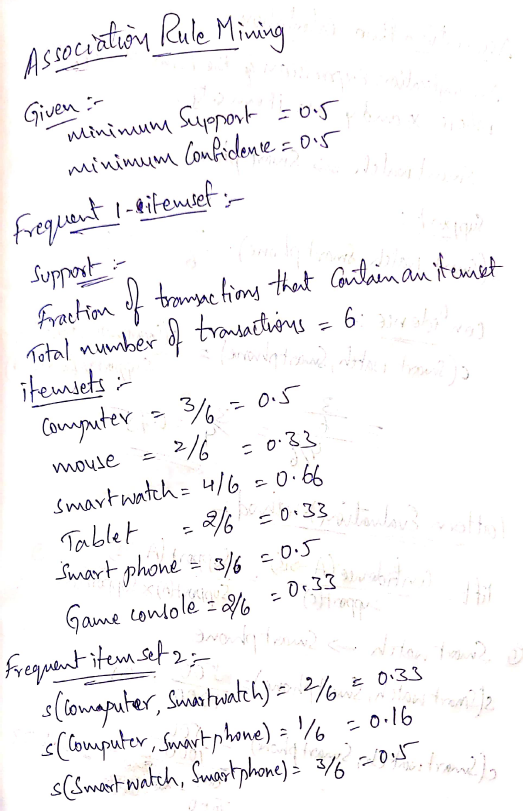

In [188]:
from IPython.display import Image
Image(filename='Image_1.png')

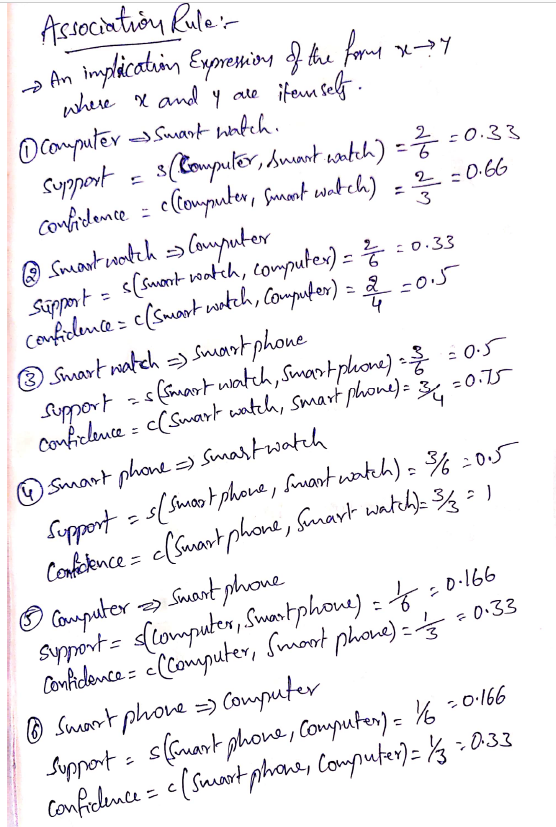

In [189]:
Image(filename='Image_2.png')

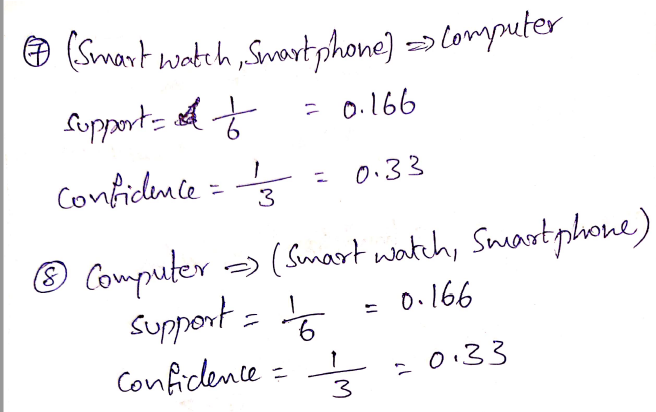

In [190]:
Image(filename='Image_3.png')

### 3.2. Pattern Evaluation Method
The support-Confidence framework is often limited because not all rules found strong by this framework are interesting. Therefore, we need to utilize other interestingness measures such as lift and chi-squared ($χ^2$). You are going to calculate those other interestingness measures from the table and compare their pros/cons.

|  |  Smart Watch  | Not Smart Watch |  
|------------|-------------|------------------|
| Smart Phone |     500    |   350    |
| Not Smart Phone   |  100    |   50    |

<br>
$$ Lift (A,B) = \frac{Confidence(A⇒B)}{Support(C)} = \frac{Support(AUB)}{Support(A)×Support(B)} $$

3.2.1 Calculation of interestingness measures (0.5 points)

Please calculate the lift and chi-squared ($χ^2$) for each rule and and include the calculation process. If it takes too much to use the Jupter Notebook to write the calculation process, you can write them on paper and turn them in as attached. Please create a table to list corresponding values:




|  Rule |  support (A⇒B)   | confidence (A⇒B) | Lift (A⇒B) | chi-squared ($χ^2$) | 
|------------|-------------|------------------|-------------------|-------------------|
| Smart Watch ⇒ Smart Phone |     0.5       |   0.833     |     0.980     | 3.267  |
| Not Smart Watch ⇒ Smart Phone |     0.35       |   0.875     |     1.029     | 3.267  |

### Manual Calculations

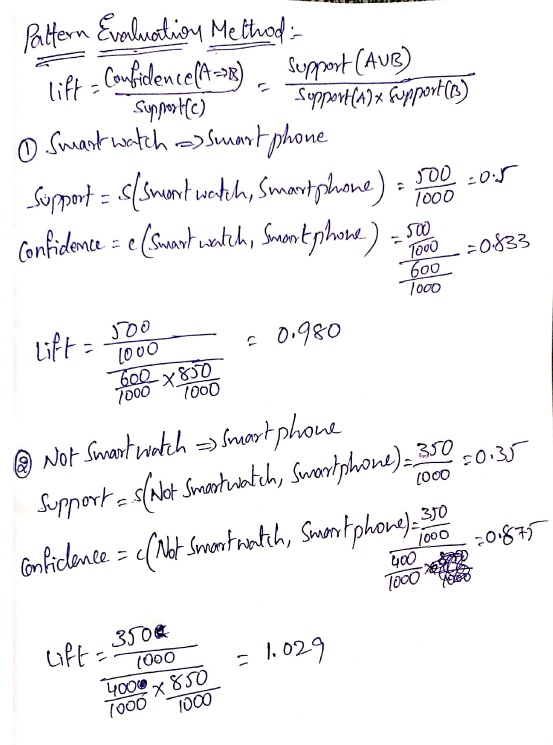

In [192]:
Image(filename='Image_4.png')

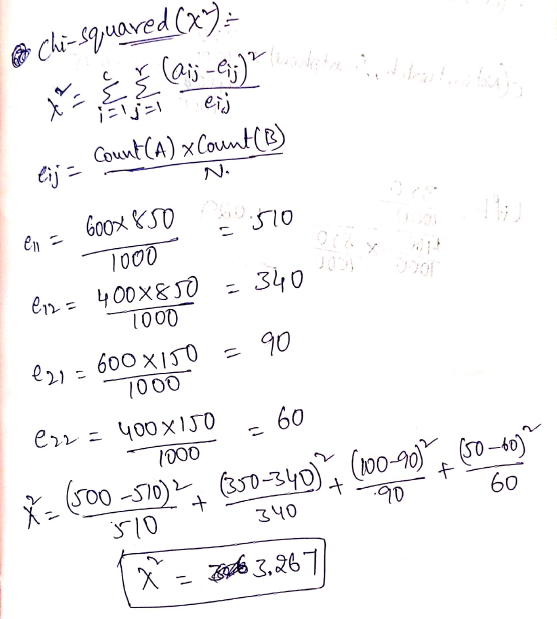

In [193]:
Image(filename='Image_5.png')

3.2.2 Insight and Explanation (0.5 points)

If you calculated correctly, each measure might tell you different stories. Let's assume that both minimum support and minimum confidence are 35% (i.e., .35). What do these interestingness measures tell you? Please explain what each measure means. In other words, can you tell whether there is a strong association or not? What are the pros/cons of each measure, particularly related to this example? How are you going to use these measures in the future according to what you learned?

#### Provide your open-ended answer
<font color='blue'>Patterns reflect items that are frequently associated or purchased together. These patterns can be represented in the form of association rules:</font><br>
<font color='blue'>In reference to the above table if we consider both minimum support and minimum confidence to be 35% both rules satisfies the support and confidence. Here, we will examine the above two way contingency table.<br>
For example, the information that customers who purchase Smart Watch also tend to buy Smart Phone at the same thing is represented in the following
association rule:</font><br>

<font color='blue'><b>Smart Watch ⇒ Smart Phone </b>[support = 50% and confidence = 83.3%] here, A support of 50% for Rule means that 50% of all the transactions under analysis show that Smart Watch and Smart Phone are purchased together. A confidence of 83.3% means that 83.3% of the customers who purchased a Smart Watch also bought the Smart Phone.</font><br>
<font color='blue'>here, the rule is misleading because the overall percentage of smart watch over smart phone is 85% which is greater than 83.3%. Moreover, here the lift value is less than 1 so it is negatively correlated.(Based on the observed and expected value in the χ2 they are negatively correlated.)</font><br>

<font color='blue'><b>Not Smart Watch ⇒ Smart Phone</b> [support = 35% and confidence = 87.5%] here, A support of 35% for Rule means that 35% of all the transactions under analysis show that Smart Watch and Smart Phone are not purchased together. A confidence of 87.5% means that 87.5% of the customers who purchased a Smart phone did not bought the Smart watch. here, the lift value is greater than 1 so it is positively correlated.</font><br>

<font color='blue'>By considreing above two rules we could see that the lift measurements for the both rules seems to be not very greater or less than 1. they both rules are very slightly independent of each other. Chi-squared value also seems to be not very greater. we could conclude that there is no strong association amoung the given rules.</font> 

<font color='blue'><b>Pros and cons:</b></font><br>
<font color='blue'>The association rules are intuitive and easy to communicate it to the end user.the above rules are very easy to interpret the results</font><br>
<font color='blue'>But, In the above example we get the rules that are conflicting with each other. So, we need to calculate different measures to make the final understandings about the rules.</font><br>
<font color='blue'>Even though we have the confidence higher, in some cases the rule may be misleading. that's why we need to go for other measures.</font> 

<font color='blue'> We can use the association rules in the marketing datasets analysis and we can find many association rules which are helpful in making useful decisions</font>


## 4. Association Rule Mining: Practice

You will practice with one of the advanced pattern mining topics, quantitative association rules. So far, you have practiced with categorical variables and calculate rules based on the contingency table. However, relational and data warehouse data often involve quantitative attributes and measures. For instance, in the Yelp dataset, most attributes are not categorical variables but numeric variables. To apply association rule mining, you can convert those attributes to binary attributes by using either median or mean split. This is not an ideal approach because it will lose information, but good enough for illustration. In this assignment, you are going to use the mean split. Based on this discretization, you will find association rules and analyze those rules. Perhaps, these association rules can help you find discriminative attributes to predict the usefulness of reviews. In other words, you can use the association rule mining for feature selection. You will need to use evaluation metrics and your own (subjective) judgments to find meaningful associations. 

### 4.1. Discretization (1 point)

Now you need to create a binary representation of attributes. We will need to include "class" attribute, but drop "review_id" attribute.  

Here is an example of converting textual representation to numeric representation. The library (MLXtend) you will use 1/0 representation for binary attributes.

```python
yelp_data['class'][yelp_data['class'] == 'useful'] = 1
yelp_data['class'][yelp_data['class'] == 'not_useful'] = 0
yelp_data["class"].astype('int')
```

Here is an example for descretization.

```python
yelp_data["degree"] = np.where(yelp_data["degree"] >= np.mean(yelp_data["degree"]),1,0)
yelp_data["degree"].astype('int')
```
You need to iteratively apply the above transformation for all attributes. 

Please load the dataset (Yelp_Usefulness_Assignment2_2.csv). As noted, there are several versions of the dataset, so please make sure that you load the correct version. Convert the data by using your own code and show the first 20 lines.

In [163]:
## This loads the csv file from disk
yelp_data2 = pd.read_csv(
    filepath_or_buffer = "Yelp_Usefulness_Assignment2_2.csv", sep = ",", header=0 )

yelp_data2.head()
# print(yelp_data.shape)

,review_id,review_stars,word_count,lexical_diversity,correct_spell_ratio,price_included,procon_included,joy,love,affection,liking,enthusiasm,sadness,dislike,despair,horror,distress,FleschReadingEase,user_review_count,yelping_months,degree,betweenness,eigenvector,business_stars,business_review_count,class
0,bRGHgwAd3zfiiDMT9JyKcA,1,23,0.869565,0.869565,0.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,81.1310,5,24,0,0.0,0.0,3.0,40,useful
1,TK-0pfhHorvwZK0YhDe2fQ,5,26,0.769231,0.846154,0.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,48.9568,22,6,1,0.0,0.0,4.5,319,useful
2,XTOQ6blQzzzoK26QRJl3zg,5,71,0.760563,0.943662,0.014085,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,95.9393,10,14,0,0.0,0.0,4.5,535,not_useful
3,KA9VwKYL-7I2LuQnXeuEBw,5,74,0.689189,0.905405,0.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,86.9222,1,3,0,0.0,0.0,5.0,28,useful
4,C2kblEfR4oMWR9oGhYN2cQ,5,31,0.903226,0.903226,0.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,63.0018,19,40,0,0.0,0.0,3.5,84,useful


In [164]:
## Provide codes
yelp_data2['class'][yelp_data2['class'] == 'useful'] = 1
yelp_data2['class'][yelp_data2['class'] == 'not_useful'] = 0
yelp_data2["class"].astype('int')
desc_yelp_data = yelp_data2.drop(['review_id'], axis = 1)

In [165]:
column_names = desc_yelp_data.columns
for column in range(len(column_names)):
    desc_yelp_data[column_names[column]] = np.where(desc_yelp_data[column_names[column]] >= np.mean(desc_yelp_data[column_names[column]]),1,0)
    desc_yelp_data[column_names[column]].astype('int')

In [166]:
desc_yelp_data.head()

,review_stars,word_count,lexical_diversity,correct_spell_ratio,price_included,procon_included,joy,love,affection,liking,enthusiasm,sadness,dislike,despair,horror,distress,FleschReadingEase,user_review_count,yelping_months,degree,betweenness,eigenvector,business_stars,business_review_count,class
0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0
3,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1
4,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [167]:
yelp_data3 = desc_yelp_data.drop(['dislike'], 1)

In [168]:
yelp_data3.columns

Index(['review_stars', 'word_count', 'lexical_diversity',
       'correct_spell_ratio', 'price_included', 'procon_included', 'joy',
       'love', 'affection', 'liking', 'enthusiasm', 'sadness', 'despair',
       'horror', 'distress', 'FleschReadingEase', 'user_review_count',
       'yelping_months', 'degree', 'betweenness', 'eigenvector',
       'business_stars', 'business_review_count', 'class'],
      dtype='object')

### 4.2. Implementation (1 point)

Now you need to create association rules between attributes. Please refer to the "association rule mining exercise" for more details. You need to change minimum support and/or other parameters to filter out less interesting rules.

Please provide the code for your association rules. If you were not able to transform the data in the previous step, you can load the preprocessed data ([Yelp_Usefulness_Assignment2_3.csv](./data/Yelp_Usefulness_Assignment2_3.csv)). Although you use this preprocessed data, any points will not be deducted.

In [177]:
## Provide codes
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
frequent_itemsets = apriori(yelp_data3, min_support=0.2, use_colnames=True)

print(frequent_itemsets)

    support                                           itemsets
0     0.629                                     (review_stars)
1     0.349                                       (word_count)
2     0.501                                (lexical_diversity)
3     0.539                              (correct_spell_ratio)
4     0.263                                   (price_included)
5     0.541                                (FleschReadingEase)
6     0.221                                (user_review_count)
7     0.456                                   (yelping_months)
8     0.590                                   (business_stars)
9     0.271                            (business_review_count)
10    0.493                                            (class)
11    0.365                  (review_stars, lexical_diversity)
12    0.344                (review_stars, correct_spell_ratio)
13    0.319                  (FleschReadingEase, review_stars)
14    0.284                     (review_stars, yelping_

In [171]:
frequent_itemsets1 = apriori(yelp_data3, min_support=0.5, use_colnames=True)
print(frequent_itemsets1)

   support               itemsets
0    0.629         (review_stars)
1    0.501    (lexical_diversity)
2    0.539  (correct_spell_ratio)
3    0.541    (FleschReadingEase)
4    0.590       (business_stars)


In [178]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold= 0.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(review_stars),(lexical_diversity),0.629,0.501,0.365,0.580286,1.158256,0.049871,1.188905
1,(lexical_diversity),(review_stars),0.501,0.629,0.365,0.728543,1.158256,0.049871,1.366699
2,(review_stars),(correct_spell_ratio),0.629,0.539,0.344,0.546900,1.014656,0.004969,1.017435
3,(correct_spell_ratio),(review_stars),0.539,0.629,0.344,0.638219,1.014656,0.004969,1.025482
4,(FleschReadingEase),(review_stars),0.541,0.629,0.319,0.589649,0.937438,-0.021289,0.904104
5,(review_stars),(FleschReadingEase),0.629,0.541,0.319,0.507154,0.937438,-0.021289,0.931326
6,(review_stars),(yelping_months),0.629,0.456,0.284,0.451510,0.990154,-0.002824,0.991814
7,(yelping_months),(review_stars),0.456,0.629,0.284,0.622807,0.990154,-0.002824,0.983581
8,(review_stars),(business_stars),0.629,0.590,0.461,0.732909,1.242219,0.089890,1.535060
9,(business_stars),(review_stars),0.590,0.629,0.461,0.781356,1.242219,0.089890,1.696822


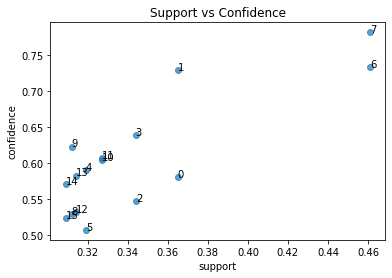

In [174]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.7)
for i in range(rules.shape[0]):
    plt.text(rules.loc[i,"support"], rules.loc[i,"confidence"], str(i))
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

### 4.3. Insight and Explanation (1 point)

Provide a couple of paragraphs' description of what rules you have found. Did you find any interesting rules? Pick one interesting rule and explain how it is interesting and how you used evaluation measures. Pick one not-interesting rule and explain how it is not interesting and how evaluation measures overate the rule. Describe the lesson you got by this exercise. Please be comprehensive to deliver what you learned. Perhaps, using graphs or tables will be helpful in finding a meaningful pattern from your experiments. Also, you can compare association rules with the attributes selected from Section 2.2. 

## Provide your open-ended answer

<font color='blue'>We have performed the discretization on the dataset and the data is further analysed to get the association rules among the itemsets.<br><b>Implementation:</b></font><br>

<font color='blue'><b>Goal of Association Rule Mining</font></b><br>
<font color='blue'>When you apply Association Rule Mining on a given set of transactions T your goal will be to find all rules with:</font><br>
<font color='blue'>1. Support greater than or equal to min_support</font><br>
<font color='blue'>2. Confidence greater than or equal to min_confidence</font>

<font color='blue'>Strong rules: If a rule A=>B[Support, Confidence] satisfies min_sup and min_confidence then it is a strong rule.
Lift: Lift gives the correlation between A and B in the rule A=>B. Correlation shows how one item-set A effects the item-set B.</font>

<font color='blue'>Step-1:
frequent-itemsets:Item-sets whose support is greater or equal than minimum support threshold (min_sup). we have set the minimum support thresold as 0.3 and generated all the itemsets with support >= pre-determined min_support count.</font>

<font color='blue'>Rule Generation: List all Association Rules from frequent-itemsets. Calculate Support and Confidence for all rules. Prune rules that fail min_support and min_confidence thresholds.</font>

<font color='blue'>From the above generated frequent itemsets, I could see that review_stars and lexical_diversity have highest support values which is greater than 0.5. I would consider this pair as an interesting one. the association rule formed by the review_stars and lexical_diversity has the minimum support more than 0.35 and the minimum confidence level for the review_stars => lexical_diversity is (0.580) and lexical_diversity => review_stars is 0.728. the interestingness measures Lift value is 1.158256 which gives us a positive correlation for both rules. this makes the rules strongly associated and more interesting rule for analysis.</font>

<font color='blue'>Form the above generated frequent itemsets I could see that lexical_diversity and yelping_months have minimum support values less than 0.3. I would consider this pair as not interesting one. The association rules formed by the lexical_diversity and yelping_months has the minimum support 0.202 and the minimum confidence value for lexical_diversity => yelping_months is (0.403) and yelping_months => lexical_diversity is (0.442). The interestingness measure Lift value is 0.8841 which gives us a negative correlation for both rules. this makes the rule less interesting to consider for the analysis. </font>

<font color='blue'>From the above exercise lesson learned is that association rules can be used to find frequent patterns, associations, correlations, or causal structures among sets of items in transaction databases. Using association rules we can find some interesting rules which can be applied in the real world.</font>

<font color='blue'>However, using association and Apriory rules we have some limitations like when support threshold is lowered more frequent itemsets are generated. if the dimensionality of the data increases it results in the increased computational cost and frequent itemsets also increases. more rules are produced and it will be difficult for the analysis with the more number of rules.</font>
